In [53]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [54]:


# Load the Box Office Mojo dataset
file_path = file_path = "C:\\Users\\ADMIN\\documents\\data-science\\movie-financial-performance-analysis\\data\\bom.movie_gross.csv"

df = pd.read_csv(file_path)
df.head()

# Read CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display basic dataset info
print("Dataset Loaded Successfully ✅")
print(df.info())

# Preview the first few rows
df.head()


Dataset Loaded Successfully ✅
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [55]:
# Read the CSV file into a DataFrame
movie_gross = pd.read_csv(file_path)

# Display dataset structure
print(" Movie Gross Data Loaded Successfully!")
print(movie_gross.info())

# Preview the first few rows
movie_gross.head()

 Movie Gross Data Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### DATA CLEANING ###

In [56]:
# Check for missing values in the movie gross dataset
movie_gross.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [57]:
# Check for duplicate rows in the dataset
duplicate_rows = movie_gross.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Optional: View the duplicate rows themselves
movie_gross[duplicate_rows]


Number of duplicate rows: 0


,title,studio,domestic_gross,foreign_gross,year


### Handing missing values ###

In [58]:
# Convert 'foreign_gross' to string and fill missing values
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].astype(str).fillna('Unknown')

# Verify missing values are gone
movie_gross['foreign_gross'].isnull().sum()


0

In [59]:
movie_gross['domestic_gross'] = movie_gross['domestic_gross'].astype(str).fillna('Unknown')
# Check number of missing values in domestic_gross
missing_domestic = movie_gross['domestic_gross'].isnull().sum()
print("Number of missing values in 'domestic_gross':", missing_domestic)

Number of missing values in 'domestic_gross':

 0


In [60]:
# Fill missing values in 'studio' 
movie_gross['studio'] = movie_gross['studio'].fillna('Unknown')

# Verify that there are no missing values left
print("Missing values in 'studio':", movie_gross['studio'].isnull().sum())

Missing values in 'studio': 0


In [61]:
# Check that there are no missing values
print(movie_gross[['domestic_gross','foreign_gross','studio']].isnull().sum())


domestic_gross    0
foreign_gross     0
studio            0
dtype: int64


### Data analysis  ###

*Objective 1:*
Total Gross Analysis Against Other Factors


 Analyze movie profitability trends by examining the relationship between features like runtime, rating, genre, and revenue

In [63]:
import pandas as pd

# Convert domestic_gross and foreign_gross to numeric, set 'Unknown' to NaN
movie_gross['domestic_gross_numeric'] = pd.to_numeric(movie_gross['domestic_gross'], errors='coerce')
movie_gross['foreign_gross_numeric'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')


In [64]:
# Sum domestic and foreign gross, ignoring NaN
movie_gross['total_gross'] = movie_gross['domestic_gross_numeric'].fillna(0) + movie_gross['foreign_gross_numeric'].fillna(0)


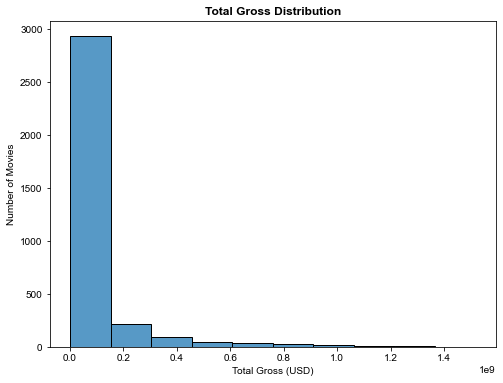

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure total_gross is numeric (coerce 'Unknown' to NaN)
movie_gross['total_gross_numeric'] = pd.to_numeric(movie_gross['total_gross'], errors='coerce')

# Drop NaNs for plotting
plot_data = movie_gross.dropna(subset=['total_gross_numeric'])

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=plot_data, x='total_gross_numeric', bins=10)
plt.title('Total Gross Distribution', weight='bold')
sns.set_style('darkgrid')
plt.xlabel('Total Gross (USD)')
plt.ylabel('Number of Movies')
plt.show()
